# Prior Knowledge

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import geopandas as gpd
import os
import re
from matplotlib.ticker import MaxNLocator
from load_files import get_measurements
path = "C:/Users/20175825/OneDrive - TU Eindhoven/Data Science Bachelor Year 3/Data Challenge 3/waterschap-aa-en-maas_sewage_2019/"

%matplotlib inline

In [2]:
flow_data, level_data = get_measurements(path + "sewer_data/data_pump/RG8150/RG8150", False)

In [3]:
flow_data.describe()

,RG_ID,Value,DataQuality
count,2885145.0,2.885145e+06,2.885145e+06
mean,8150.0,4.244629e+02,9.984247e-01
std,0.0,2.191488e+02,3.965892e-02
min,8150.0,0.000000e+00,0.000000e+00
25%,8150.0,2.689742e+02,1.000000e+00
50%,8150.0,5.083130e+02,1.000000e+00
75%,8150.0,5.471727e+02,1.000000e+00
max,8150.0,1.200000e+03,1.000000e+00


In [4]:
level_data.describe()

,RG_ID,Value,DataQuality
count,884203.0,884203.000000,884203.000000
mean,8150.0,-0.797148,0.994882
std,0.0,0.381277,0.071354
min,8150.0,-1.811214,0.000000
25%,8150.0,-1.103166,1.000000
50%,8150.0,-0.783741,1.000000
75%,8150.0,-0.483211,1.000000
max,8150.0,2.175049,1.000000


In [5]:
#flow_data = flow_data[:100000].copy()

In [6]:
level_data["TimeStamp"] = level_data.apply(lambda row: datetime.datetime.strptime(row["TimeStamp"], '%d-%m-%Y %H:%M:%S'), axis = 1)
flow_data["TimeStamp"] = flow_data.apply(lambda row: datetime.datetime.strptime(row["TimeStamp"], '%d-%m-%Y %H:%M:%S'), axis = 1)

In [7]:
flow_data.set_index('TimeStamp', inplace= True)

Text(0.5, 0, 'Date')

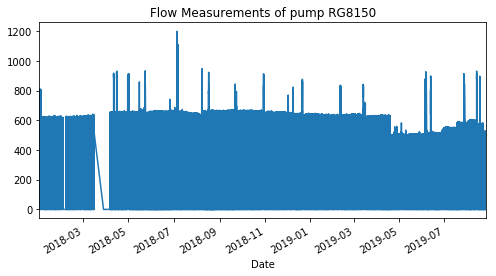

In [30]:
fig, ax = plt.subplots(figsize=(8, 4))
flow_data['Value'].plot()
ax.set_title('Flow Measurements of pump RG8150')
ax.set_xlabel('Date')

In [9]:
level_data.set_index('TimeStamp', inplace= True)

Text(0.5, 0, 'Date')

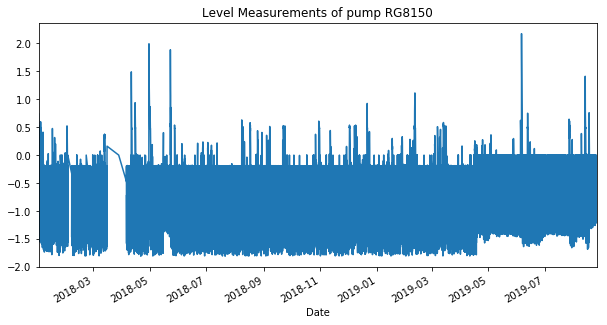

In [31]:
fig, ax = plt.subplots(figsize=(10, 5))
level_data['Value'].plot()

ax.set_title('Level Measurements of pump RG8150')
ax.set_xlabel('Date')


# Daily

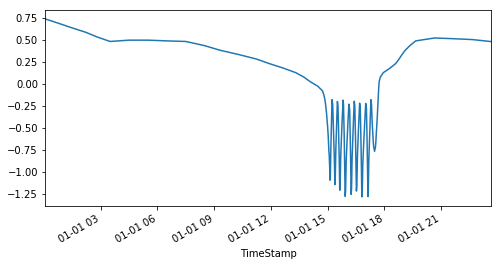

In [11]:
fig, ax = plt.subplots(figsize=(8, 4))
level_data['1-1-2018']['Value'].plot()

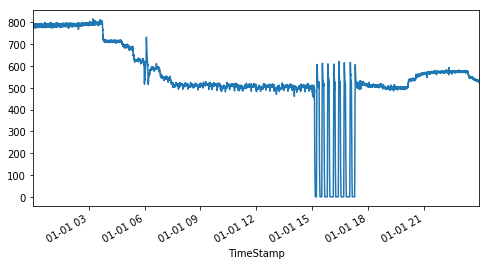

In [12]:
fig, ax = plt.subplots(figsize=(8, 4))
flow_data['1-1-2018']['Value'].plot()

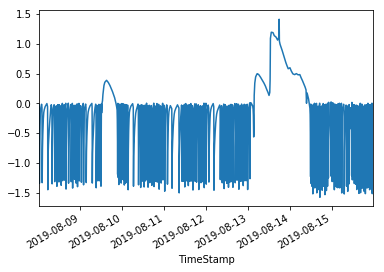

In [13]:
level_data.loc['8-8-2019':'8-15-2019']['Value'].plot()

In [29]:
level_data['7-1-2019'].index.month

Int64Index([7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
            ...
            7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
           dtype='int64', name='TimeStamp', length=965)

Text(0.5, 1.0, 'Level data on July 1, 2019')

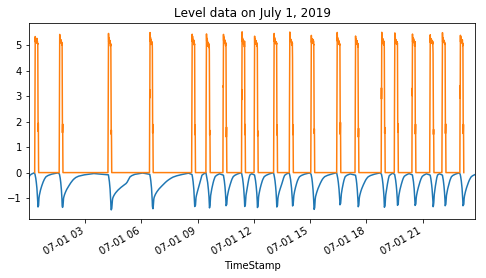

In [49]:
fig, ax = plt.subplots(figsize=(8, 4))
level_data['7-1-2019']['Value'].plot()
(flow_data['7-1-2019']['Value'] * 0.01).plot()
ax.set_title('Level data on July 1, 2019')

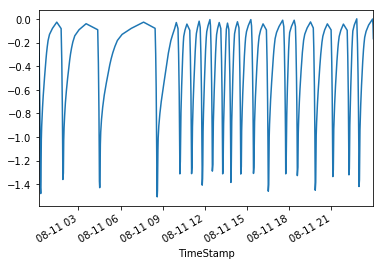

In [16]:
level_data['8-11-2019']['Value'].plot()

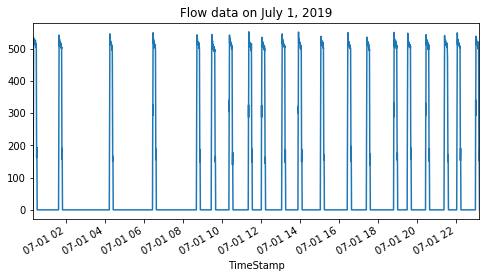

In [33]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('Flow data on July 1, 2019')
flow_data['7-1-2019']['Value'].plot()

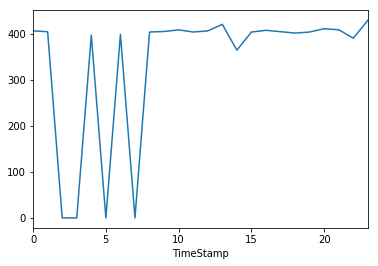

In [46]:

flow_data['7-1-2019'].groupby(flow_data['7-1-2019'].index.hour).mean()['Value'].plot()

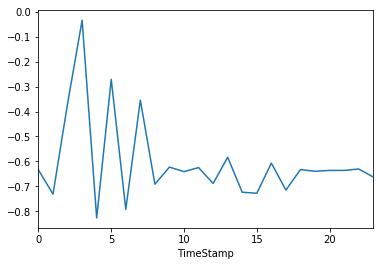

In [47]:
level_data['7-1-2019'].groupby(level_data['7-1-2019'].index.hour).mean()['Value'].plot()

# Droogweeraanvoer

# Rainfall

In [44]:
def get_rain(path, convert_time=False):
    files = os.listdir(path)
    data = [pd.read_csv(path + "/" + i, sep = ",", skiprows=2) for i in files]
    data =  pd.concat(data, axis= 0, join= 'outer')

    if convert_time == True:
        data["Begin"] = data.apply(lambda row: datetime.datetime.strptime(row["Begin"], '%d-%m-%Y %H:%M:%S'), axis = 1)
        data["Eind"] = data.apply(lambda row: datetime.datetime.strptime(row["Eind"], '%d-%m-%Y %H:%M:%S'), axis = 1)
    
    return data

rain = get_rain(path + "sewer_data/rain_timeseries", True)
rain

,Begin,Eind,Kwaliteit,Lekerstraat,11. Speelweide/Vlinkert,Rips,Handel,14. Koolhof,13. Heiakker,Vlierden,...,Ooivaarsrijt,de Brand,Bitswijk,de Geer-zuid,De Hoeven(Haarsteeg),11+19 Grevekeur,CHV-terrein,Geb. 12 Vughterpoort,Heusdenseweg(Haarsteeg),Bosscheweg
0,2018-05-31 22:00:00,2018-05-31 22:05:00,HydroNET D2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,2018-05-31 22:05:00,2018-05-31 22:10:00,HydroNET D2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,2018-05-31 22:10:00,2018-05-31 22:15:00,HydroNET D2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,2018-05-31 22:15:00,2018-05-31 22:20:00,HydroNET D2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,2018-05-31 22:20:00,2018-05-31 22:25:00,HydroNET D2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,2018-05-31 22:25:00,2018-05-31 22:30:00,HydroNET D2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,2018-05-31 22:30:00,2018-05-31 22:35:00,HydroNET D2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,2018-05-31 22:35:00,2018-05-31 22:40:00,HydroNET D2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,2018-05-31 22:40:00,2018-05-31 22:45:00,HydroNET D2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9,2018-05-31 22:45:00,2018-05-31 22:50:00,HydroNET D2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [19]:
#pd.read_csv(path + "sewer_data/rain_timeseries/Download__5_201806302200_201807312200.csv", skiprows=2)

In [45]:
rain['Total'] = rain[rain.columns[3:]].sum(axis= 1)

In [46]:
rain.set_index('Begin', inplace= True)
rain.sort_index(inplace=True)

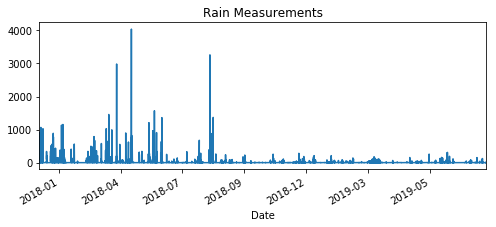

In [43]:
fig, ax = plt.subplots(figsize=(8, 3))
rain['Total'].plot()
ax.set_title('Rain Measurements')
ax.set_xlabel('Date')
ax.xaxis.set_major_locator(MaxNLocator(8))
#ax.set_xticklabels([ax.get_xticks()])#[i] for i in range(0, 8, 2)])


In [76]:
rain2[rain2['Eind']- rain2['Begin'] == "00:05:00"].set_index('Begin')['Total']

Begin
2018-05-31 22:00:00    0.0
2018-05-31 22:05:00    0.0
2018-05-31 22:10:00    0.0
2018-05-31 22:15:00    0.0
2018-05-31 22:20:00    0.0
2018-05-31 22:25:00    0.0
2018-05-31 22:30:00    0.0
2018-05-31 22:35:00    0.0
2018-05-31 22:40:00    0.0
2018-05-31 22:45:00    0.0
2018-05-31 22:50:00    0.0
2018-05-31 22:55:00    0.0
2018-05-31 23:00:00    0.0
2018-05-31 23:05:00    0.0
2018-05-31 23:10:00    0.0
2018-05-31 23:15:00    0.0
2018-05-31 23:20:00    0.0
2018-05-31 23:25:00    0.0
2018-05-31 23:30:00    0.0
2018-05-31 23:35:00    0.0
2018-05-31 23:40:00    0.0
2018-05-31 23:45:00    0.0
2018-05-31 23:50:00    0.0
2018-05-31 23:55:00    0.0
2018-06-01 00:00:00    0.0
2018-06-01 00:05:00    0.0
2018-06-01 00:10:00    0.0
2018-06-01 00:15:00    0.0
2018-06-01 00:20:00    0.0
2018-06-01 00:25:00    0.0
                      ... 
2019-07-31 19:30:00    0.0
2019-07-31 19:35:00    0.0
2019-07-31 19:40:00    0.0
2019-07-31 19:45:00    0.0
2019-07-31 19:50:00    0.0
2019-07-31 19:55:00   

Text(0.5, 0, 'Date')

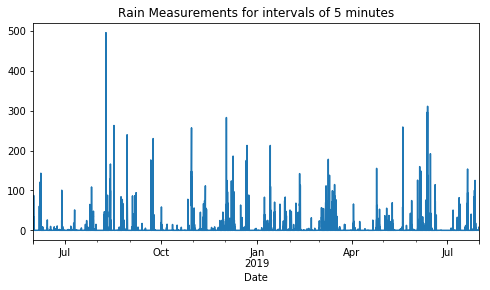

In [63]:
rain2 = rain.reset_index().copy()
fig, ax = plt.subplots(figsize=(8, 4))
rain2[rain2['Eind']- rain2['Begin'] == "00:05:00"].set_index('Begin')['Total'].plot()
ax.set_title('Rain Measurements for intervals of 5 minutes')
ax.set_xlabel('Date')



Text(0.5, 0, 'Date')

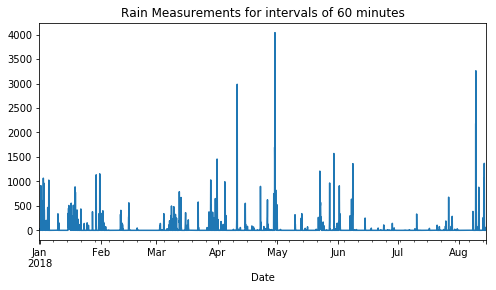

In [73]:
rain2 = rain.reset_index().copy()
fig, ax = plt.subplots(figsize=(8, 4))
rain2[rain2['Eind']- rain2['Begin'] == "00:60:00"].set_index('Begin')['Total'].plot()
ax.set_title('Rain Measurements for intervals of 60 minutes')
ax.set_xlabel('Date')

In [52]:
level2 = level_data.copy()
level2['Value(mm)'] = level2['Value'] * 1000
level2['Value(mm)'] = level2['Value(mm)'] + abs(level2['Value(mm)'].min())
level2['Value(mm)'].plot()

,Eind,Kwaliteit,Lekerstraat,11. Speelweide/Vlinkert,Rips,Handel,14. Koolhof,13. Heiakker,Vlierden,Helenaveen,...,de Brand,Bitswijk,de Geer-zuid,De Hoeven(Haarsteeg),11+19 Grevekeur,CHV-terrein,Geb. 12 Vughterpoort,Heusdenseweg(Haarsteeg),Bosscheweg,Total
Begin,,,,,,,,,,,,,,,,,,,,,
2017-12-31 23:00:00,2018-01-01 00:00:00,HydroNET D2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2018-01-01 00:00:00,2018-01-01 01:00:00,HydroNET D2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0124,0.0000,0.0000,0.0000,0.0000,0.0000,0.3494
2018-01-01 01:00:00,2018-01-01 02:00:00,HydroNET D2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0244,0.0082,0.0000,0.0789,0.0489,0.0000,0.0000,0.0820,0.0000,3.3192
2018-01-01 02:00:00,2018-01-01 03:00:00,HydroNET D2,0.0000,0.0223,0.0000,0.0000,0.0000,0.0000,0.0000,0.1636,...,0.0932,0.0199,0.0689,0.0186,0.0373,0.0351,0.0609,0.0205,0.0000,14.9670
2018-01-01 03:00:00,2018-01-01 04:00:00,HydroNET D2,0.0000,0.0000,0.0000,0.0000,0.0477,0.0049,0.0032,0.0000,...,0.0509,0.0264,0.0984,0.0036,0.0269,0.0110,0.0323,0.0176,0.0000,28.2811
2018-01-01 04:00:00,2018-01-01 05:00:00,HydroNET D2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0197,0.1833,0.0000,0.0231,0.0672,0.0000,0.0000,0.0000,16.0137
2018-01-01 05:00:00,2018-01-01 06:00:00,HydroNET D2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.2495,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,20.4787
2018-01-01 06:00:00,2018-01-01 07:00:00,HydroNET D2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2018-01-01 07:00:00,2018-01-01 08:00:00,HydroNET D2,0.2993,0.0875,0.0000,0.1210,0.0000,0.0000,0.0818,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,13.5919
